In [1]:
#importing the libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers,models
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import PIL
import os
from keras.applications.vgg16 import VGG16


In [2]:
img_height = 48
img_width = 48

In [3]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory='train/',
    #validation_split=0.2,
    #subset="training",
    seed=123,
    batch_size=32,
    image_size=(48, 48),
    color_mode='grayscale')

test_dataset = keras.utils.image_dataset_from_directory(
    directory='test/',
    #validation_split=0.2,
    #subset="validation",
    seed=123,
    batch_size=32,
    image_size=(48, 48),
    shuffle=False,
    color_mode='grayscale')
    
classes = train_dataset.class_names
no_of_classes = len(classes)
    

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [14]:
#CNN custom model 
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  #layers.Dropout(0.2),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  #layers.Dropout(0.2),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  #ayers.Dropout(0.2),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(64, activation='relu'),
  layers.Dense(no_of_classes,activation='softmax')
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
#CNN model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_15 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_16 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 64)      

In [17]:
#training of the CNN model
epochs=10
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/10
898/898 [==============================] - 978s 1s/step - loss: 1.9190 - accuracy: 0.2533 - val_loss: 1.6928 - val_accuracy: 0.3123
Epoch 2/10
898/898 [==============================] - 986s 1s/step - loss: 1.6796 - accuracy: 0.3310 - val_loss: 1.5799 - val_accuracy: 0.3865
Epoch 3/10
898/898 [==============================] - 842s 938ms/step - loss: 1.5877 - accuracy: 0.3744 - val_loss: 1.5047 - val_accuracy: 0.4224
Epoch 4/10
898/898 [==============================] - 788s 877ms/step - loss: 1.5045 - accuracy: 0.4123 - val_loss: 1.4495 - val_accuracy: 0.4386
Epoch 5/10
898/898 [==============================] - 751s 837ms/step - loss: 1.4434 - accuracy: 0.4386 - val_loss: 1.4230 - val_accuracy: 0.4508
Epoch 6/10
898/898 [==============================] - 742s 826ms/step - loss: 1.3898 - accuracy: 0.4617 - val_loss: 1.3622 - val_accuracy: 0.4731
Epoch 7/10
898/898 [==============================] - 742s 826ms/step - loss: 1.3467 - accuracy: 0.4810 - val_loss: 1.3368 - val_a

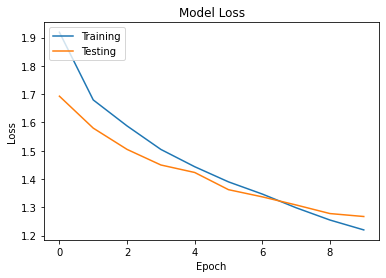

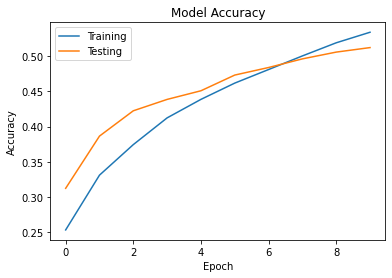

In [19]:
#plotting the accuracy and loss graphs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

In [ ]:
#collecting data for the predictions.csv file
import os
from keras.preprocessing import image
import numpy as np

path = os.getcwd()
testfolder_path = path + '/EMOTOR_TEST'

images = []
files = []
predictions = []
for img in os.listdir(testfolder_path):
    files.append(img)
    img = os.path.join(testfolder_path, img)
    img = image.load_img(img, target_size=(48,48),color_mode='grayscale')
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
    predictions.append(classes[np.argmax(model.predict(img))])
    


In [25]:
#creating the predictions.csv file
import pandas as pd

df = pd.DataFrame({'img_name':files})
df['label'] = predictions

df.to_csv("predictions.csv",index=False)

In [26]:
#saving the model to the disk
model_json = model.to_json()
with open("model.json", "w") as json_file:
 json_file.write(model_json)
 model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
